In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import math

# Load Data

In [2]:
wine_df = pd.read_csv("WineQT.csv")

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

# Statistics Task
## Finding correlation
I'm going to use panda's "corr" function to discover the correlation between each column and the quality column, using the Pearson method (the default method for this function).

In [5]:
correlations = {}
for column in wine_df:
    if(column == "quality" or column == "Id"):
        continue
    else:
        correlations[column] = wine_df[column].corr(wine_df["quality"])

Next, I'm going to sort these columns by correlation.

In [6]:
correlations_order = sorted(correlations, key=lambda k: -abs(correlations[k]))
for k in correlations_order:
    print("%s: %f" % (k, correlations[k]))

alcohol: 0.484866
volatile acidity: -0.407394
sulphates: 0.257710
citric acid: 0.240821
total sulfur dioxide: -0.183339
density: -0.175208
chlorides: -0.124085
fixed acidity: 0.121970
free sulfur dioxide: -0.063260
pH: -0.052453
residual sugar: 0.022002


This clearly shows that alcohol content has the highest influence on quality (a positive correlation), and volatile acidity has the second highest influence on quality (a negative correlation), followed by sulphate concentration. Thus, according to this data, the ideal wine has very high alcohol content, very low volatile acidity, and very high sulphate concentration. Citric acid concentration is close very close to sulphates in significance, but everything below these two is pretty inconsequential by comparision.

## Correlation matrix
We just looked at the correlation between each column and quality, but let's build a correlation matrix just to see if any of these attributes impact each other.

In [7]:
correlation_matrix_list = ["quality"] + correlations_order[:3]
correlation_matrix_list

['quality', 'alcohol', 'volatile acidity', 'sulphates']

In [8]:
correlation_matrix = {}
for k1 in correlation_matrix_list:
    correlation_matrix[k1] = {}
    for k2 in correlation_matrix_list:
        correlation_matrix[k1][k2] = wine_df[k1].corr(wine_df[k2])
cmdf = pd.DataFrame(correlation_matrix)
cmdf

,quality,alcohol,volatile acidity,sulphates
quality,1.000000,0.484866,-0.407394,0.257710
alcohol,0.484866,1.000000,-0.203909,0.094421
volatile acidity,-0.407394,-0.203909,1.000000,-0.276079
sulphates,0.257710,0.094421,-0.276079,1.000000


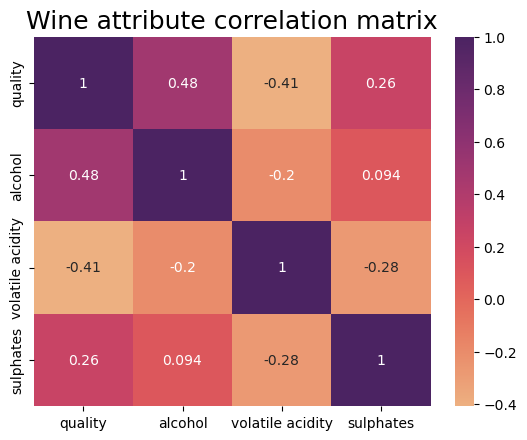

In [9]:
# choosing flare since it's the most wine-y palette I could find
sns.heatmap(cmdf, annot=True, cmap="flare")
plt.title("Wine attribute correlation matrix",fontsize=18)
plt.show()

The most significant correlation is still between ABV and quality, but the most significant non-quality related correlation is the correlation between sulphates and volatile acidity.

## Bar plot

The assignment states:

*Select any four attributes and appropriate statistical results, and use bar plots to present
them. Use a Markdown cell to explain the purpose of your figure and the big takeaway.*

Obviously, I should choose four attributes that are measured the same way.

Volatile acidity, sulphates, citric acid, and chlorides are all measured in grams per liter, so lets go with those.

In [10]:
bar_vars = ["volatile acidity", "sulphates", "citric acid", "chlorides"]

Let's just compare the average values of each.

In [11]:
bar_avgs = []
for var in bar_vars:
    bar_avgs.append(wine_df[var].mean())

bar_avgs

[np.float64(0.5313385826771653),
 np.float64(0.6577077865266842),
 np.float64(0.2683639545056868),
 np.float64(0.08693263342082239)]

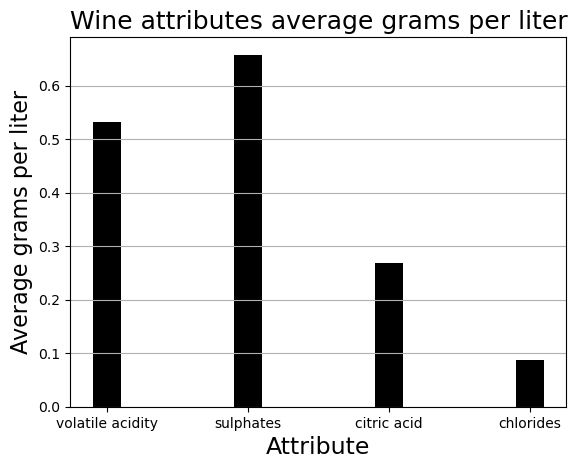

In [12]:
plt.bar(bar_vars, bar_avgs, width=0.2, color="#000000", align="center")
plt.title("Wine attributes average grams per liter",fontsize=18)
plt.xlabel("Attribute",fontsize=17)
plt.ylabel("Average grams per liter",fontsize=16)
plt.grid(axis='y')
plt.show()

My main takeaway from this is that sulphates tend to be pretty common in wines, while clorides generally don't pop up as much, comparatively.

## Line plot
The assignment says:

*Select any four attributes and appropriate statistical results, and use line plots to present them. Use a Markdown cell to explain the purpose of your figure and the big takeaway.*

This is weird. What the heck is my x axis supposed to be? There's no independent variable like time or anything here! My only real choice is to plot with ID as the X axis. Pretty meaningless, but all I can work with.

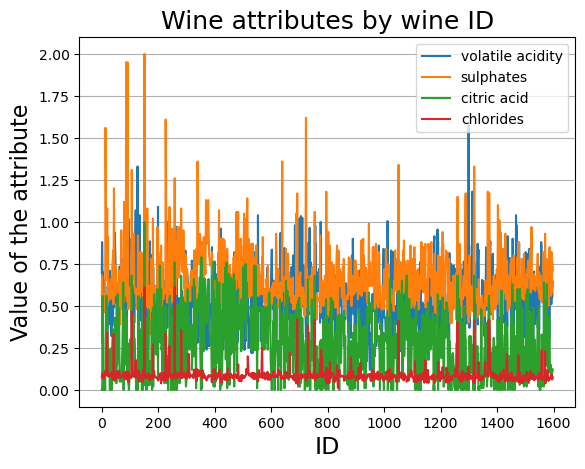

In [13]:
for var in bar_vars:
    plt.plot(wine_df["Id"], wine_df[var], label = var)
plt.legend()

plt.title("Wine attributes by wine ID",fontsize=18)
plt.xlabel("ID",fontsize=17)
plt.ylabel("Value of the attribute",fontsize=16)
plt.grid(axis='y')

plt.show()

This figure has no purpose, and there is no meaningful takeaway from this. Its only purpose it meet the requirements of the assignment.

# Data Mining Tasks
## K-Means
The assignment asks:

*Can you classify wines into different price categories based on their chemical
attributes ('fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur
dioxide', 'sulphates', 'alcohol') using K-means clustering?*

The answer is **no**. No one with a soul would try to assign price categories to wine. It's a sort of sacrilege to apply impure capatalistic concepts like price to something like wine, something that makes people happy. That's a disgusting thing to ask of someone.

I can try to classify wines into quality categories though, I guess.

There are a lot of dimensions here, but doing K-Means with more than 2 dimensions sounds really hard. Therefore, I'm just gonna pick the big two: ABV and quality!

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaled_wine= StandardScaler().fit_transform(wine_df.iloc[:, 0 : -2])
scaled_wine

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [48]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_wine)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

In [49]:
labels = kmeans.labels_

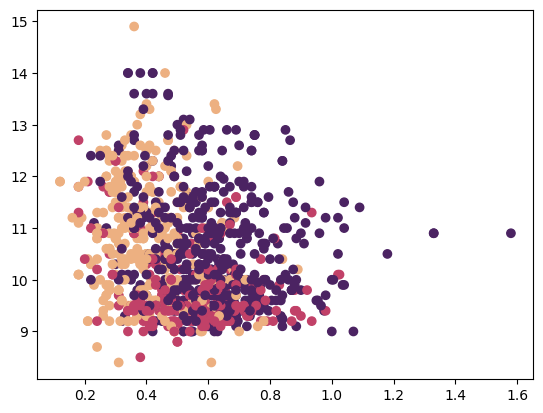

In [50]:
plt.scatter(wine_df["volatile acidity"], wine_df["alcohol"], c=labels, cmap="flare")
plt.show()

In [ ]:
# hi